In [2]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd
df_train = pd.read_csv("C:\\Users\\gaurav.mittal\\OneDrive - Thermo Fisher Scientific\\Desktop\\Personal\\Personal\\Articles\\Infoworld\\SeriesOfArticles\\trainedData.txt",delimiter=';',names=['text','label'])

df_train.reset_index(inplace=True,drop=True)
print("Shape of the DataFrame:",df_train.shape)
print(df_train.sample(5))

Shape of the DataFrame: (520, 2)
                                                  text                label
374  A customer reported complex integration diffic...  ConfigurationIssues
375  The ticket described unexpected behavior in di...  ConfigurationIssues
409  The support request detailed service mesh conf...  ConfigurationIssues
327  The ticket described complex VPN connection di...  ConfigurationIssues
363  The ticket described complex identity federati...  ConfigurationIssues


<Axes: xlabel='label', ylabel='count'>

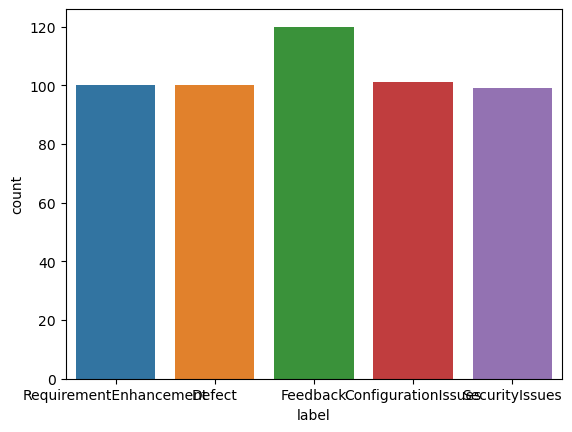

In [4]:
import seaborn as sns
from sklearn import preprocessing 
sns.countplot(data=df_train, x="label")



In [5]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [6]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [7]:
corpus = text_transformation(df_train['text'])

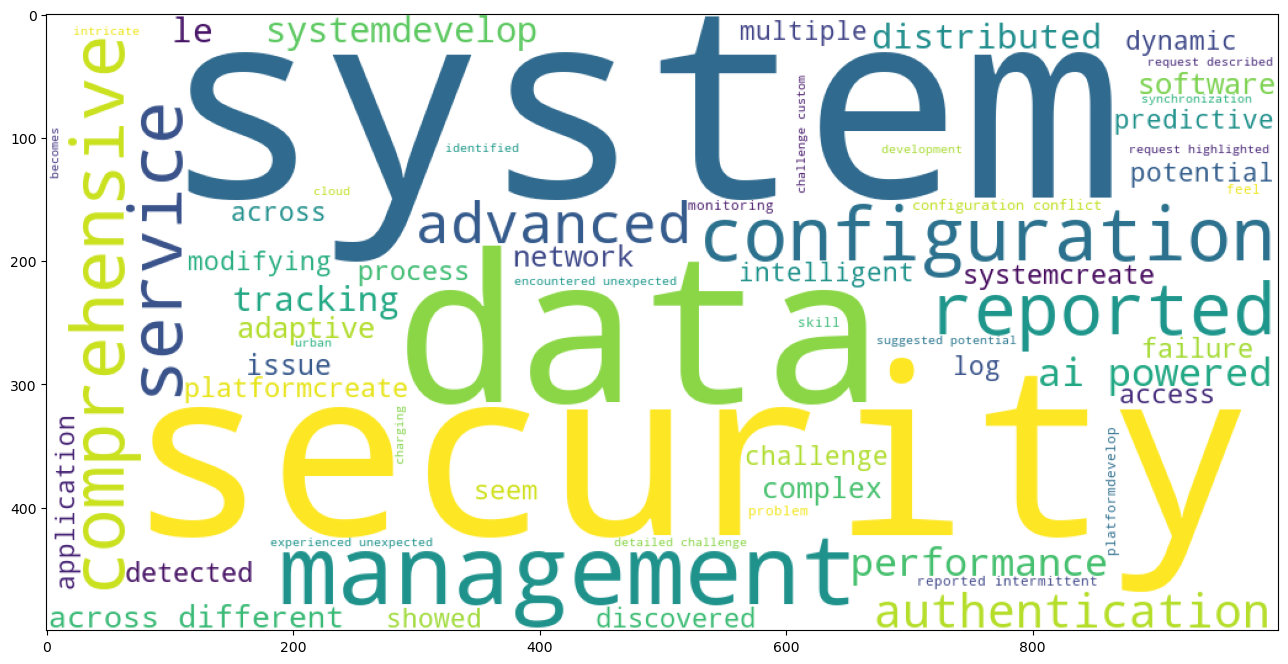

In [8]:
#!python -m pip install wordcloud
import matplotlib as mlp
from wordcloud import WordCloud
mlp.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
mlp.pyplot.imshow(wordcloud)

In [9]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df_train.label

In [20]:
clf = MultinomialNB().fit(X, y)

In [43]:
print(clf.predict(cv.transform(["Add advanced filtering and export options for reports"])))

['RequirementEnhancement']


In [26]:
#Reading Test Data
test_df = pd.read_csv('C:\\Users\\gaurav.mittal\\OneDrive - Thermo Fisher Scientific\\Desktop\\Personal\\Personal\\Articles\\Infoworld\\SeriesOfArticles\\test_Data.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label

#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = clf.predict(testdata)
y_pred = clf.predict(testdata)


In [44]:
input = 'requirement defect'
print(clf.predict(cv.transform([input])))

['ConfigurationIssues']


In [45]:
input = 'Add real-time translation and transcription services'
print(clf.predict(cv.transform([input])))

['RequirementEnhancement']


In [16]:
!python -m pip install scikit-plot

Accuracy_score:  0.8409090909090909
Precision_score:  0.8409090909090909
Recall_score:  0.8409090909090909
--------------------------------------------------
                        precision    recall  f1-score   support

   ConfigurationIssues       0.71      0.92      0.80        24
                Defect       0.89      0.81      0.85        42
              Feedback       0.96      0.71      0.81        31
RequirementEnhancement       0.50      0.33      0.40         3
        SecurityIssues       0.84      1.00      0.91        32

              accuracy                           0.84       132
             macro avg       0.78      0.75      0.76       132
          weighted avg       0.85      0.84      0.84       132



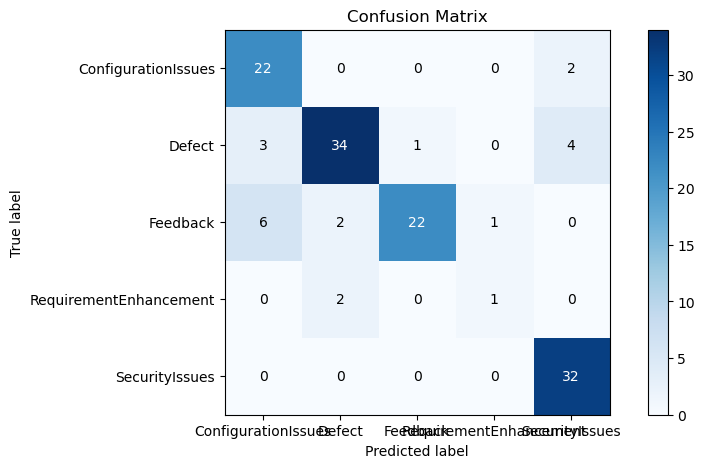

In [37]:
#Evaluating the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
mlp.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions,average='micro')
rec_score = recall_score(y_test,predictions,average='micro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)